# Autoregressive Distributed Lag (ARDL) models

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_style("darkgrid")
sns.mpl.rc("figure",figsize=(16,6))
sns.mpl.rc("font",size=14)

In [2]:
from statsmodels.datasets.danish_data import load
from statsmodels.tsa.api import ARDL
from statsmodels.tsa.ardl import ardl_select_order

data = load().data
data = data[["lrm","lry","ibo","ide"]]
data.tail()

,lrm,lry,ibo,ide
period,,,,
1986-07-01,12.056189,6.098992,0.111500,0.067941
1986-10-01,12.071628,6.080706,0.114267,0.075396
1987-01-01,12.027952,6.061175,0.119333,0.076653
1987-04-01,12.039788,6.063730,0.117333,0.076259
1987-07-01,12.015294,6.050830,0.118967,0.075163


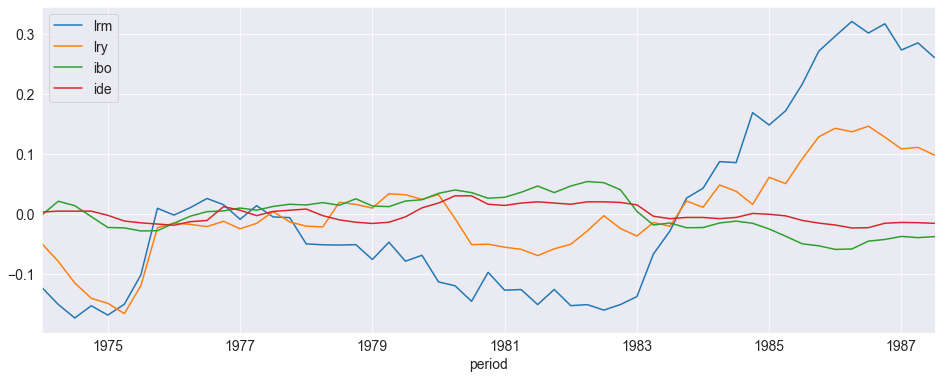

In [3]:
_ = (data - data.mean()).plot()

In [4]:
sel_res = ardl_select_order(
    data.lrm, 3, data[["lry", "ibo", "ide"]], 3, ic="aic", trend="c"
)
sel_res.model.ardl_order

(3, 1, 3, 2)

In [5]:
res = sel_res.model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:                    lrm   No. Observations:                   55
Model:               ARDL(3, 1, 3, 2)   Log Likelihood                 139.513
Method:               Conditional MLE   S.D. of innovations              0.017
Date:                Fri, 30 Jul 2021   AIC                           -251.026
Time:                        11:00:01   BIC                           -223.708
Sample:                    10-01-1974   HQIC                          -240.553
                         - 07-01-1987                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6202      0.492      5.329      0.000       1.656       3.584
lrm.L1         0.3192      0.118      2.697      0.007       0.087       0.551
lrm.L2         0.5326      0.115      4.646      0.000       0.308       0.757
lrm.L3        -0.2687      0.088     -3.037      0.002      -0.442      -0.095
lry.L0         0.6728      0.114      5.923      0.000       0.450       0.895
lry.L1        -0.2574      0.127     -2.020      0.043      -0.507      -0.008
ibo.L0        -1.0785      0.279     -3.871      0.000      -1.625      -0.532
ibo.L1        -0.1062      0.507     -0.209      0.834      -1.101       0.888
ibo.L2         0.2877      0.493      0.584      0.559      -0.678       1.254
ibo.L3        -0.9947      0.340     -2.926      0.003      -1.661      -0.328
ide.L0         0.1255      0.480      0.261      0.794      -0.816       1.067
ide.L1        -0.3280      0.625     -0.525      0.600      -1.552       0.896
ide.L2         1.4079      0.478      2.945      0.003       0.471       2.345
==============================================================================
"""

In [6]:
sel_res = ardl_select_order(
    data.lrm, 3, data[["lry", "ibo", "ide"]], 3, ic="bic", trend="c", glob=True
)
sel_res.model.ardl_order

(3, 0, 3, 2)

In [7]:
sel_res.model.ar_lags

[1, 2, 3]

In [8]:
sel_res.model.dl_lags

{'lry': [0], 'ibo': [0, 3], 'ide': [2]}

In [9]:
for i, val in enumerate(sel_res.bic.head(10)):
    print(f"{i+1}: {val}")

1: ((1, 2, 3), {'lry': (0,), 'ibo': (0, 3), 'ide': (2,)})
2: ((1, 2, 3), {'lry': (0, 1), 'ibo': (0, 3), 'ide': (2,)})
3: ((2,), {'lry': (0,), 'ibo': (0, 3), 'ide': (3,)})
4: ((1, 2, 3), {'lry': (0, 2), 'ibo': (0, 3), 'ide': (2,)})
5: ((2,), {'lry': (0, 2), 'ibo': (0, 3), 'ide': (2,)})
6: ((2,), {'lry': (0, 3), 'ibo': (0, 3), 'ide': (2,)})
7: ((2, 3), {'lry': (0,), 'ibo': (0, 3), 'ide': (2,)})
8: ((1, 2, 3), {'lry': (0,), 'ibo': (0, 3), 'ide': (2, 3)})
9: ((2,), {'lry': (0,), 'ibo': (0, 3), 'ide': (2, 3)})
10: ((1, 2), {'lry': (0,), 'ibo': (0, 3), 'ide': (3,)})


In [10]:
res = ARDL(
    data.lrm, 2, data[["lry", "ibo", "ide"]], {"lry": 1, "ibo": 2, "ide": 3}, trend="c"
).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:                    lrm   No. Observations:                   55
Model:               ARDL(2, 1, 2, 3)   Log Likelihood                 136.252
Method:               Conditional MLE   S.D. of innovations              0.019
Date:                Fri, 30 Jul 2021   AIC                           -246.504
Time:                        11:00:03   BIC                           -220.890
Sample:                    10-01-1974   HQIC                          -236.654
                         - 07-01-1987                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4440      0.479      5.107      0.000       1.506       3.382
lrm.L1         0.2695      0.122      2.216      0.027       0.031       0.508
lrm.L2         0.3409      0.100      3.412      0.001       0.145       0.537
lry.L0         0.6344      0.127      4.980      0.000       0.385       0.884
lry.L1        -0.2426      0.139     -1.741      0.082      -0.516       0.030
ibo.L0        -1.1316      0.314     -3.599      0.000      -1.748      -0.515
ibo.L1         0.1056      0.561      0.188      0.851      -0.994       1.205
ibo.L2        -0.8347      0.436     -1.914      0.056      -1.690       0.020
ide.L0         0.2849      0.538      0.529      0.596      -0.770       1.340
ide.L1         0.0433      0.706      0.061      0.951      -1.340       1.427
ide.L2         0.4429      0.675      0.656      0.512      -0.881       1.766
ide.L3         0.3671      0.452      0.812      0.417      -0.519       1.253
==============================================================================
"""

In [11]:
res = ARDL(
    data.lrm,
    2,
    data[["lry", "ibo", "ide"]],
    {"lry": 1, "ibo": 2, "ide": 3},
    trend="c",
    causal=True,
).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARDL Model Results                              
==============================================================================
Dep. Variable:                    lrm   No. Observations:                   55
Model:               ARDL(2, 1, 2, 3)   Log Likelihood                 121.130
Method:               Conditional MLE   S.D. of innovations              0.025
Date:                Fri, 30 Jul 2021   AIC                           -222.260
Time:                        11:00:03   BIC                           -202.557
Sample:                    10-01-1974   HQIC                          -214.683
                         - 07-01-1987                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3885      0.633      3.776      0.000       1.149       3.628
lrm.L1         0.4294      0.154      2.791      0.005       0.128       0.731
lrm.L2         0.2777      0.126      2.203      0.028       0.031       0.525
lry.L1         0.2064      0.127      1.629      0.103      -0.042       0.455
ibo.L1        -1.2787      0.425     -3.008      0.003      -2.112      -0.446
ibo.L2        -0.3403      0.516     -0.659      0.510      -1.352       0.671
ide.L1        -0.1234      0.678     -0.182      0.856      -1.453       1.206
ide.L2         0.5001      0.890      0.562      0.574      -1.243       2.244
ide.L3         0.6106      0.597      1.024      0.306      -0.559       1.780
==============================================================================
"""

In [12]:
from statsmodels.tsa.api import UECM

sel_res = ardl_select_order(
    data.lrm, 3, data[["lry", "ibo", "ide"]], 3, ic="aic", trend="c"
)

ecm = UECM.from_ardl(sel_res.model)
ecm_res = ecm.fit()
ecm_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              UECM Model Results                              
==============================================================================
Dep. Variable:                  D.lrm   No. Observations:                   55
Model:               UECM(3, 1, 3, 2)   Log Likelihood                 139.513
Method:               Conditional MLE   S.D. of innovations             11.756
Date:                Fri, 30 Jul 2021   AIC                           -251.026
Time:                        11:00:03   BIC                           -223.708
Sample:                    10-01-1974   HQIC                          -240.553
                         - 07-01-1987                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6202      0.492      5.329      0.000       1.656       3.584
lrm.L1        -0.4169      0.079     -5.252      0.000      -0.572      -0.261
lry.L1         0.4154      0.102      4.078      0.000       0.216       0.615
ibo.L1        -1.8917      0.339     -5.585      0.000      -2.556      -1.228
ide.L1         1.2053      0.387      3.114      0.002       0.447       1.964
D.lrm.L1      -0.2639      0.088     -2.990      0.003      -0.437      -0.091
D.lrm.L2       0.2687      0.088      3.037      0.002       0.095       0.442
D.lry.L0       0.6728      0.114      5.923      0.000       0.450       0.895
D.ibo.L0      -1.0785      0.279     -3.871      0.000      -1.625      -0.532
D.ibo.L1       0.7070      0.406      1.742      0.082      -0.089       1.503
D.ibo.L2       0.9947      0.340      2.926      0.003       0.328       1.661
D.ide.L0       0.1255      0.480      0.261      0.794      -0.816       1.067
D.ide.L1      -1.4079      0.478     -2.945      0.003      -2.345      -0.471
==============================================================================
"""

In [14]:
params = ecm_res.params
ci_speed_of_adj = params.iloc[1]
ci_vector = params.iloc[1:5] / ci_speed_of_adj
print(f"Speed fo adj: {ci_speed_of_adj}")
print("CI vector")
print(ci_vector)

Speed fo adj: -0.41685239891420744
CI vector
lrm.L1    1.000000
lry.L1   -0.996468
ibo.L1    4.538116
ide.L1   -2.891520
dtype: float64


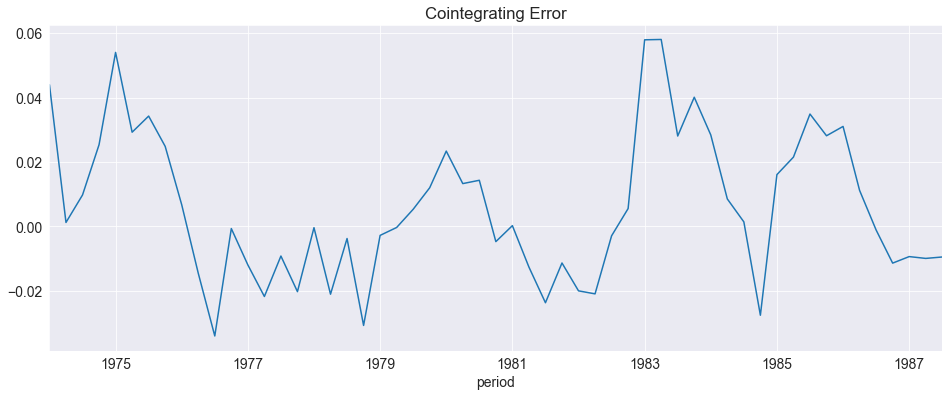

In [17]:
ci_error = params.const + data.lrm * params["lrm.L1"]
for col in ("lry","ibo","ide"):
    ci_error += data[col] * params[f"{col}.L1"]
_ = ci_error.plot(title="Cointegrating Error")

In [ ]:
ecm = UECM(data.lrm, 2, data[["lry", "ibo", "ide"]], 2, seasonal=True)
ecm.fit().summary()